# Criando um modelo de previsão de doenças hepáticas

In [126]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando a base de dados.
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
dados.shape

(583, 11)

In [4]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
# Amostra dos dados
dados.sample(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
440   49  Female              0.8               0.2                   198   
432   29    Male              0.7               0.2                   165   
212   22    Male              2.7               1.0                   160   
469   66    Male              0.8               0.2                   165   
371   33    Male              0.8               0.2                   135   
39    47    Male              2.7               1.3                   275   
49    55    Male             18.4               8.8                   206   
64    57    Male              1.3               0.4                   259   
24    63    Male              0.9               0.2                   194   
102   17    Male              0.9               0.2                   224   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
440                        23                          20             7.0   
432                        55                          87             7.5   
212                        82                         127             5.5   
469                        22                          32             4.4   
371                        30                          29             7.2   
39                        123                          73             6.2   
49                         64                         178             6.2   
64                         40                          86             6.5   
24                         52                          45             6.0   
102                        36                          45             6.9   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
440      4.3                        1.50        1  
432      4.6                        1.58        1  
212      3.1                        1.20        2  
469      2.0                        0.80        1  
371      4.4                        1.50        2  
39       3.3                        1.10        1  
49       1.8                        0.40        1  
64       2.5                        0.60        1  
24       3.9                        1.85        2  
102      4.2                        1.55        1

## Análise Exploratória de Dados

In [6]:
# Tipos de Dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# Variáveis categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
dados.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

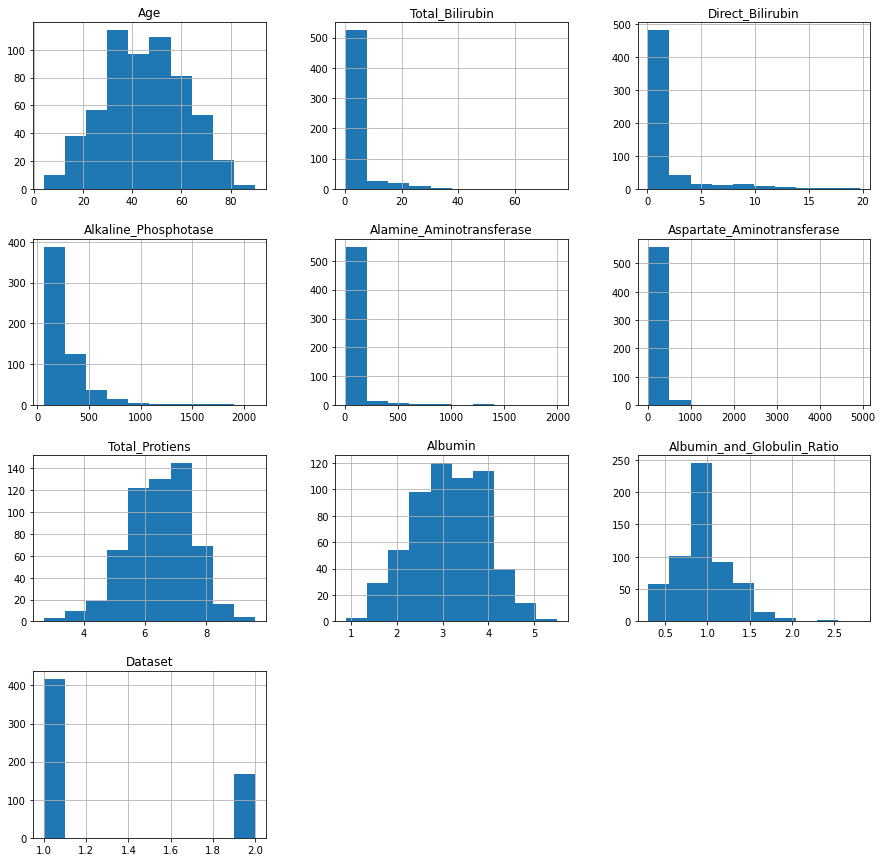

In [10]:
# Plot histograma
dados.hist(figsize = (15,15), bins=10)
plt.show()

In [11]:
# Função para ajustar variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [12]:
# aplicar a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [13]:
# Vamos ajustar o nome da Variável target
dados.rename({'Dataset': 'Target'}, axis = 'columns', inplace = True)

In [14]:
dados.sample(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
351   37    Male              1.3               0.4                   195   
427   65    Male              0.9               0.2                   170   
339   75    Male              1.4               0.4                   215   
57    48  Female              0.9               0.2                   175   
562   66    Male             17.3               8.5                   388   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
351                        41                          38             5.3   
427                        33                          66             7.0   
339                        50                          30             5.9   
57                         24                          54             5.5   
562                       173                         367             7.8   

     Albumin  Albumin_and_Globulin_Ratio  Target  
351      2.1                        0.60       1  
427      3.0                        0.75       1  
339      2.6                        0.70       1  
57       2.7                        0.90       0  
562      2.6                        0.50       1

In [15]:
# Correlação entre as variáveis
dados.corr()

Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.011763          0.007529   
Total_Bilirubin             0.011763         1.000000          0.874618   
Direct_Bilirubin            0.007529         0.874618          1.000000   
Alkaline_Phosphotase        0.080425         0.206669          0.234939   
Alamine_Aminotransferase   -0.086883         0.214065          0.233894   
Aspartate_Aminotransferase -0.019910         0.237831          0.257544   
Total_Protiens             -0.187461        -0.008099         -0.000139   
Albumin                    -0.265924        -0.222250         -0.228531   
Albumin_and_Globulin_Ratio -0.216408        -0.206267         -0.200125   
Target                      0.137351         0.220208          0.246046   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.080425                 -0.086883   
Total_Bilirubin                         0.206669                  0.214065   
Direct_Bilirubin                        0.234939                  0.233894   
Alkaline_Phosphotase                    1.000000                  0.125680   
Alamine_Aminotransferase                0.125680                  1.000000   
Aspartate_Aminotransferase              0.167196                  0.791966   
Total_Protiens                         -0.028514                 -0.042518   
Albumin                                -0.165453                 -0.029742   
Albumin_and_Globulin_Ratio             -0.234166                 -0.002375   
Target                                  0.184866                  0.163416   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.019910       -0.187461   
Total_Bilirubin                               0.237831       -0.008099   
Direct_Bilirubin                              0.257544       -0.000139   
Alkaline_Phosphotase                          0.167196       -0.028514   
Alamine_Aminotransferase                      0.791966       -0.042518   
Aspartate_Aminotransferase                    1.000000       -0.025645   
Total_Protiens                               -0.025645        1.000000   
Albumin                                      -0.085290        0.784053   
Albumin_and_Globulin_Ratio                   -0.070040        0.234887   
Target                                        0.151934       -0.035008   

                             Albumin  Albumin_and_Globulin_Ratio    Target  
Age                        -0.265924                   -0.216408  0.137351  
Total_Bilirubin            -0.222250                   -0.206267  0.220208  
Direct_Bilirubin           -0.228531                   -0.200125  0.246046  
Alkaline_Phosphotase       -0.165453                   -0.234166  0.184866  
Alamine_Aminotransferase   -0.029742                   -0.002375  0.163416  
Aspartate_Aminotransferase -0.085290                   -0.070040  0.151934  
Total_Protiens              0.784053                    0.234887 -0.035008  
Albumin                     1.000000                    0.689632 -0.161388  
Albumin_and_Globulin_Ratio  0.689632                    1.000000 -0.163131  
Target                     -0.161388                   -0.163131  1.000000

## Exploração da Variável Categórica

In [16]:
dados.describe(include=['object'])

Gender
count     583
unique      2
top      Male
freq      441

Número de pacientes do sexo Masculino: 441
Número de pacientes do sexo Feminino: 142


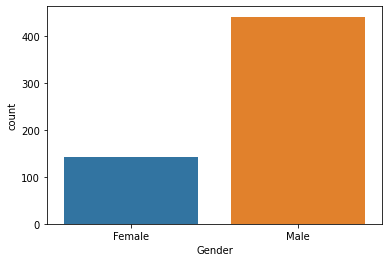

In [17]:
# Plot
sns.countplot(data=dados, x='Gender', label='Count')

# Value Counts
M, F = dados['Gender'].value_counts()

# Print
print(f'Número de pacientes do sexo Masculino: {M}')
print(f'Número de pacientes do sexo Feminino: {F}')

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação do gráficos a seguir.

In [18]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [19]:
dados['Gender'] = dados['Gender'].map(encoding_func)

In [20]:
dados.sample(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
326   36       1              1.2               0.4                   358   
476   38       0              0.9               0.3                   310   
570   16       0              2.6               1.2                   236   
561   66       0             16.6               7.6                   315   
387   51       0              0.8               0.2                   160   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
326                       160                          90             8.3   
476                        15                          25             5.5   
570                       131                          90             5.4   
561                       233                         384             6.9   
387                        34                          20             6.9   

     Albumin  Albumin_and_Globulin_Ratio  Target  
326      4.4                         1.1       0  
476      2.7                         1.0       1  
570      2.6                         0.9       1  
561      2.0                         0.4       1  
387      3.7                         1.1       1

## Verificando a Relação entre Atributos

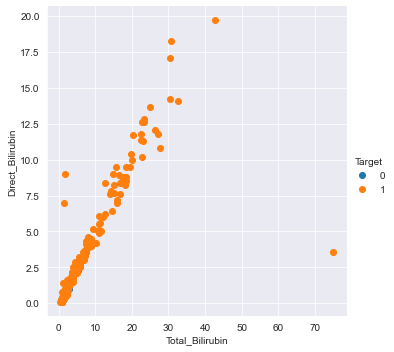

In [21]:
# Define o estilo do background
sns.set_style('darkgrid')

# Facetgrid pela variável target.
sns.FacetGrid(dados, hue='Target', size=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()


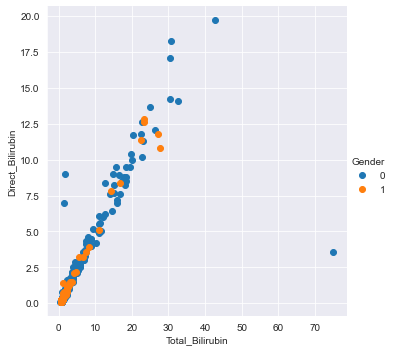

In [22]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid pela variável gender.
sns.FacetGrid(dados, hue='Gender', size=5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

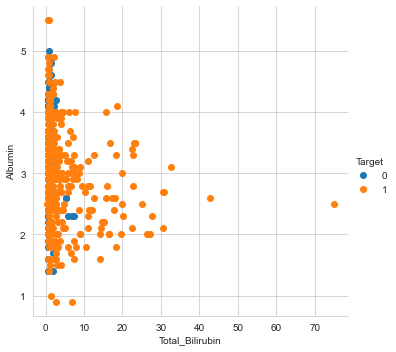

In [23]:
# Define o estilo do background
sns.set_style('whitegrid')

# FacetGrid
sns.FacetGrid(dados, hue='Target', size=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

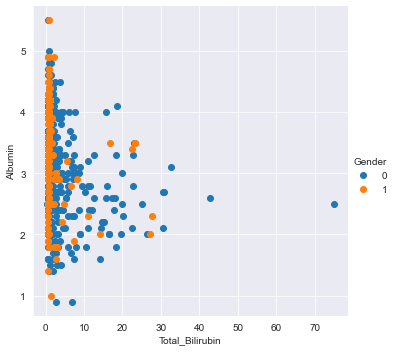

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
sns.FacetGrid(dados, hue='Gender', size=5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

## Verificando Valores Ausentes e Registros Duplicados

In [25]:
# Verificando valores ausentes
dados[dados.isnull().values]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45       1              0.9               0.3                   189   
241   51       0              0.8               0.2                   230   
253   35       1              0.6               0.2                   180   
312   27       0              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Target  
209      3.9                         NaN       1  
241      3.1                         NaN       1  
253      2.7                         NaN       0  
312      4.8                         NaN       0

In [26]:
# Verificando registros duplicados (complete cases)
dados[dados.duplicated(keep=False)]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
18    40       1              0.9               0.3                   293   
19    40       1              0.9               0.3                   293   
25    34       0              4.1               2.0                   289   
26    34       0              4.1               2.0                   289   
33    38       1              2.6               1.2                   410   
34    38       1              2.6               1.2                   410   
54    42       0              8.9               4.5                   272   
55    42       0              8.9               4.5                   272   
61    58       0              1.0               0.5                   158   
62    58       0              1.0               0.5                   158   
105   36       0              5.3               2.3                   145   
106   36       0              5.3               2.3                   145   
107   36       0              0.8               0.2                   158   
108   36       0              0.8               0.2                   158   
137   18       0              0.8               0.2                   282   
138   18       0              0.8               0.2                   282   
142   30       0              1.6               0.4                   332   
143   30       0              1.6               0.4                   332   
157   72       0              0.7               0.1                   196   
158   72       0              0.7               0.1                   196   
163   39       0              1.9               0.9                   180   
164   39       0              1.9               0.9                   180   
173   31       0              0.6               0.1                   175   
174   31       0              0.6               0.1                   175   
200   49       0              0.6               0.1                   218   
201   49       0              0.6               0.1                   218   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
18                        232                         245             6.8   
19                        232                         245             6.8   
25                        875                         731             5.0   
26                        875                         731             5.0   
33                         59                          57             5.6   
34                         59                          57             5.6   
54                         31                          61             5.8   
55                         31                          61             5.8   
61                         37                          43             7.2   
62                         37                          43             7.2   
105                        32                          92             5.1   
106                        32                          92             5.1   
107                        29                          39             6.0   
108                        29                          39             6.0   
137                        72                         140             5.5   
138                        72                         140             5.5   
142                        84                         139             5.6   
143                        84                         139             5.6   
157                        20                          35             5.8   
158                        20                          35             5.8   
163                        42                          62             7.4   
164                        42                          62             7.4   
173                        48                          34             6.0   
174                        48                          34             6.0   


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [27]:
dados.shape

(583, 11)

In [28]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
dados.shape

(570, 11)

### Tratamento de Outliers

In [29]:
dados.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  570.000000  570.000000       570.000000        570.000000   
mean    44.849123    0.245614         3.321754          1.497544   
std     16.242182    0.430829         6.267941          2.833231   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            570.000000                570.000000   
mean             291.750877                 79.728070   
std              245.291859                181.471697   
min               63.000000                 10.000000   
25%              176.000000                 23.000000   
50%              208.000000                 35.000000   
75%              298.000000                 60.000000   
max             2110.000000               2000.000000   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  570.000000      570.000000  570.000000   
mean                   109.380702        6.496316    3.148947   
std                    290.880671        1.088300    0.796813   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     41.000000        6.600000    3.100000   
75%                     86.750000        7.200000    3.800000   
max                   4929.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio      Target  
count                  566.000000  570.000000  
mean                     0.948004    0.712281  
std                      0.319635    0.453097  
min                      0.300000    0.000000  
25%                      0.700000    0.000000  
50%                      0.950000    1.000000  
75%                      1.100000    1.000000  
max                      2.800000    1.000000

In [30]:
dados.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  570.000000  570.000000       570.000000        570.000000   
mean    44.849123    0.245614         3.321754          1.497544   
std     16.242182    0.430829         6.267941          2.833231   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            570.000000                570.000000   
mean             291.750877                 79.728070   
std              245.291859                181.471697   
min               63.000000                 10.000000   
25%              176.000000                 23.000000   
50%              208.000000                 35.000000   
75%              298.000000                 60.000000   
max             2110.000000               2000.000000   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  570.000000      570.000000  570.000000   
mean                   109.380702        6.496316    3.148947   
std                    290.880671        1.088300    0.796813   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     41.000000        6.600000    3.100000   
75%                     86.750000        7.200000    3.800000   
max                   4929.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio      Target  
count                  566.000000  570.000000  
mean                     0.948004    0.712281  
std                      0.319635    0.453097  
min                      0.300000    0.000000  
25%                      0.700000    0.000000  
50%                      0.950000    1.000000  
75%                      1.100000    1.000000  
max                      2.800000    1.000000

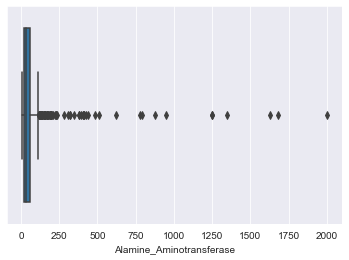

In [31]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase);

Será que  os valores exremos são mesmo outliers?

In [32]:
# Contagem de Frequência por valor
dados.Alamine_Aminotransferase.sort_values(ascending=False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

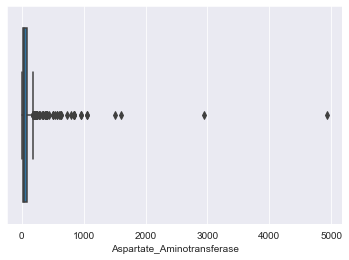

In [33]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase);

In [34]:
# Contagem de Frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [35]:
# Matém somente os registros onde o valor for menor ou igual a 3000
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

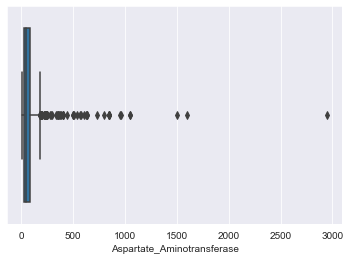

In [36]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase);

In [37]:
# Contagem de Frequência por valor
dados.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [38]:
# Matém somente os registros onde o valor for menor ou igual a 2500
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

In [39]:
dados.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  568.000000  568.000000       568.000000        568.000000   
mean    44.834507    0.246479         3.291197          1.482042   
std     16.237569    0.431340         6.257583          2.826056   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            568.000000                568.000000   
mean             290.482394                 74.286972   
std              243.271522                155.240601   
min               63.000000                 10.000000   
25%              175.750000                 23.000000   
50%              208.000000                 35.000000   
75%              298.000000                 60.000000   
max             2110.000000               1680.000000   

       Aspartate_Aminotransferase  Total_Protiens     Albumin  \
count                  568.000000      568.000000  568.000000   
mean                    95.901408        6.496831    3.150000   
std                    171.956479        1.089500    0.797571   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     41.000000        6.600000    3.100000   
75%                     86.000000        7.200000    3.800000   
max                   1600.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio      Target  
count                  564.000000  568.000000  
mean                     0.948174    0.711268  
std                      0.319301    0.453573  
min                      0.300000    0.000000  
25%                      0.700000    0.000000  
50%                      0.950000    1.000000  
75%                      1.100000    1.000000  
max                      2.800000    1.000000

### Tratamento de Valores Ausentes

In [41]:
dados.isnull().values.any()

True

In [42]:
# Verifica quantas colunas tem valores ausentes.
dados.isnull().values.any().sum()

1

In [51]:
# Lista os valores ausentes
dados[dados.isnull().values]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45       1              0.9               0.3                   189   
241   51       0              0.8               0.2                   230   
253   35       1              0.6               0.2                   180   
312   27       0              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Target  
209      3.9                         NaN       1  
241      3.1                         NaN       1  
253      2.7                         NaN       0  
312      4.8                         NaN       0

In [52]:
dados.shape

(568, 11)

In [53]:
# Drop dos registros com valores ausentes em qualquer coluna (any) pois como só temos 4 registros não há porque tratar, pois a quantidade é muito pequena.
dados = dados.dropna(how = 'any')

In [54]:
dados.shape

(564, 11)

In [55]:
# Listar valores ausentes
dados[dados.isnull().values]

Empty DataFrame
Columns: [Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Target]
Index: []

In [56]:
dados.sample(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
280   58       0              0.8               0.2                   123   
345   60       0              2.9               1.3                   230   
500   70       0              2.7               1.2                   365   
244   54       0              0.8               0.2                   218   
114   50       0              5.8               3.0                   661   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
280                        56                          48             6.0   
345                        32                          44             5.6   
500                        62                          55             6.0   
244                        20                          19             6.3   
114                       181                         285             5.7   

     Albumin  Albumin_and_Globulin_Ratio  Target  
280      3.0                        1.00       1  
345      2.0                        0.50       1  
500      2.4                        0.60       1  
244      2.5                        0.60       1  
114      2.3                        0.67       0

## Pré-Processamento de Dados para construção do Modelo de Machine Learning

In [58]:
# Dada a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin
dados = dados.drop('Direct_Bilirubin', 1)

In [59]:
dados.shape

(564, 10)

### Divisão em Treino e Teste

In [60]:
# Cria um objeto separado para a variável target
y = dados.Target

In [61]:
# Cria um objeto Separado para as variáveis de entrada
X = dados.drop('Target', axis=1)

In [62]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 1234, stratify = dados.Target)

In [63]:
len(X_treino)

423

In [64]:
len(X_teste)

141

In [65]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


In [72]:
X_teste.head()

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
220   37       0              0.8                   147   
448   48       1              0.8                   142   
509   46       0             20.0                   254   
415   70       0              1.3                   690   
56    33       0              0.8                   198   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
220                        27                          46             5.0   
448                        26                          25             6.0   
509                       140                         540             5.4   
415                        93                          40             3.6   
56                         26                          23             8.0   

     Albumin  Albumin_and_Globulin_Ratio  
220      2.5                         1.0  
448      2.6                         0.7  
509      3.0                         1.2  
415      2.7                         0.7  
56       4.0                         1.0

### Balanceamento de Classes

In [66]:
y_treino.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [73]:
# Instalar o pacote
!pip install -q imblearn

In [74]:
# Caregando a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [75]:
# Aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

**Explique por que o balanceamento de classe é feito somente com os dados de treino**

Porque é neste momento que se faz necessário uma melhor distribuição dos dados em torno da target para evitar que o modelo aprenda a reconhecer mais um padrão que o outro.

In [77]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [82]:
len(X_res)

602

In [83]:
len(y_res)

602

In [80]:
# Ajustar o nome do dataset de treino para X
X_treino = X_res

In [81]:
# Ajustar o nome do dataset de treino para Y
y_treino = y_res

### Padronização dos Dados

In [85]:
# Calculamos a média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print()
print(treino_std)

Age                            43.725914
Gender                          0.202658
Total_Bilirubin                 2.662057
Alkaline_Phosphotase          268.523256
Alamine_Aminotransferase       62.916944
Aspartate_Aminotransferase     78.797342
Total_Protiens                  6.528926
Albumin                         3.265012
Albumin_and_Globulin_Ratio      1.010424
dtype: float64

Age                            16.315615
Gender                          0.402314
Total_Bilirubin                 5.565577
Alkaline_Phosphotase          223.719429
Alamine_Aminotransferase      139.909739
Aspartate_Aminotransferase    143.933217
Total_Protiens                  1.020959
Albumin                         0.758696
Albumin_and_Globulin_Ratio      0.312563
dtype: float64


In [87]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [88]:
X_treino.head()

Age    Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0  0.078090 -0.503731        -0.029118             -0.471677   
1  1.732946 -0.503731        -0.334567             -0.538725   
2 -1.576766 -0.503731        -0.334567              0.060239   
3 -0.105783 -0.503731         1.120808              0.015541   
4 -0.105783 -0.503731        -0.334567             -0.632593   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                 -0.249568                   -0.394609        1.049086   
1                 -0.285305                   -0.304289       -0.518068   
2                  0.064921                    0.425216       -1.007803   
3                 -0.228125                   -0.123650       -0.713962   
4                 -0.242420                   -0.339028       -1.595486   

    Albumin  Albumin_and_Globulin_Ratio  
0  0.968752                    0.286584  
1 -0.349299                   -0.033351  
2 -1.008325                   -0.673222  
3 -1.667351                   -1.633029  
4 -0.744715                    0.606520

In [89]:
# Describe
X_treino.describe()

Age        Gender  Total_Bilirubin  Alkaline_Phosphotase  \
count  6.020000e+02  6.020000e+02     6.020000e+02          6.020000e+02   
mean   1.062273e-16  1.180304e-17    -2.360607e-17          2.360607e-17   
std    1.000000e+00  1.000000e+00     1.000000e+00          1.000000e+00   
min   -2.434840e+00 -5.037305e-01    -4.064371e-01         -9.186652e-01   
25%   -7.186927e-01 -5.037305e-01    -3.432279e-01         -4.359177e-01   
50%    7.809000e-02 -5.037305e-01    -3.165991e-01         -3.152308e-01   
75%    8.135817e-01 -5.037305e-01    -1.379506e-01          6.023949e-02   
max    2.836184e+00  1.981891e+00     1.299739e+01          8.231188e+00   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count              6.020000e+02                6.020000e+02    6.020000e+02   
mean               2.360607e-17               -2.360607e-17   -1.327841e-16   
std                1.000000e+00                1.000000e+00    1.000000e+00   
min               -3.782220e-01               -4.779810e-01   -3.750321e+00   
25%               -2.924524e-01               -3.807137e-01   -6.160148e-01   
50%               -2.209778e-01               -2.869202e-01    6.961472e-02   
75%               -7.088101e-02               -5.591025e-02    6.572972e-01   
max                1.155804e+01                1.056881e+01    3.008027e+00   

            Albumin  Albumin_and_Globulin_Ratio  
count  6.020000e+02                6.020000e+02  
mean  -1.534395e-16               -7.908034e-16  
std    1.000000e+00                1.000000e+00  
min   -3.117207e+00               -2.272900e+00  
25%   -6.129096e-01               -6.732224e-01  
50%    4.611609e-02               -3.335132e-02  
75%    7.816778e-01                6.065197e-01  
max    2.945829e+00                5.725488e+00

In [90]:
# Usamos méia e desvio de trenio para padronizar o conjunto de dados de teste
X_teste = (X_teste - treino_mean) / treino_std

**Explique porque usamos média e desvio dos dados de treino para padronizar os dados de teste.**

Porque de outra forma não teríamos os dados no mesmo padrão e escala.

In [91]:
X_teste.head()

Age    Gender  Total_Bilirubin  Alkaline_Phosphotase  \
220 -0.412238 -0.503731        -0.334567             -0.543195   
448  0.261963  1.981891        -0.334567             -0.565544   
509  0.139381 -0.503731         3.115211             -0.064917   
415  1.610364 -0.503731        -0.244729              1.883952   
56  -0.657402 -0.503731        -0.334567             -0.315231   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
220                 -0.256715                   -0.227865       -1.497539   
448                 -0.263863                   -0.373766       -0.518068   
509                  0.550948                    3.204282       -1.105750   
415                  0.215018                   -0.269551       -2.868798   
56                  -0.263863                   -0.387661        1.440874   

      Albumin  Albumin_and_Globulin_Ratio  
220 -1.008325                   -0.033351  
448 -0.876520                   -0.993158  
509 -0.349299                    0.606520  
415 -0.744715                   -0.993158  
56   0.968752                   -0.033351

### Construção, Treinamento e Avaliaçaõ do Modelo 1 com Regressão Logística (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogistcRegression.html

Para a primeira versão do modelo o ideal é escolher um algoritmo simples, fácil de compreender e que será usado como Benchmark

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

In [99]:
# Define lista de hiperparâmetros
tuned_params_v1 = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1', 'l2']
}

In [100]:
# Criaremos o modelo com GridSearch
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [101]:
# Treinando o modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [102]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=10)

In [103]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [104]:
# Mostrar as 10 primeiras previsões
y_pred_v1[: 10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [105]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [107]:
# Mostrar as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[7.55157594e-01, 2.44842406e-01],
       [4.32559596e-01, 5.67440404e-01],
       [6.07206902e-05, 9.99939279e-01],
       [7.96149390e-01, 2.03850610e-01],
       [6.64824757e-01, 3.35175243e-01],
       [6.51256234e-01, 3.48743766e-01],
       [7.35467836e-01, 2.64532164e-01],
       [6.48632671e-02, 9.35136733e-01],
       [5.25277565e-01, 4.74722435e-01],
       [5.72222438e-03, 9.94277776e-01]])

In [108]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcular a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [109]:
# Mostrar as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.24484241, 0.5674404 , 0.99993928, 0.20385061, 0.33517524,
       0.34874377, 0.26453216, 0.93513673, 0.47472243, 0.99427778])

In [112]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16
print('Para o ponto de dado {}, classse real = {}, classe prevista = {}, probabilidade prevista = {}'.format(i, y_teste.iloc[i], 
                                                                                                             y_pred_v1[i], y_pred_proba_v1[i]))

Para o ponto de dado 16, classse real = 1, classe prevista = 1, probabilidade prevista = 0.8624095384245196


In [113]:
# Matriz de Confusão
confusion_matrix(y_teste, y_pred_v1)

array([[30, 10],
       [36, 65]], dtype=int64)

In [115]:
# Extraindo cada valor da Confusion Matriz (tn=True Negative, fp=False Positive, fn=False Negative, tp=True Positive)
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [116]:
print(tn, fp, fn, tp)

30 10 36 65


In [117]:
# Calcular a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)

In [119]:
print(roc_auc_v1)

0.6967821782178218


In [121]:
# Calcular a curva ROC com dados e previsão em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [124]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7349009900990099


In [128]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.6737588652482269


### Feature Importance

In [133]:
# Construindo o modelo novamente com os melhores hiperparametros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C=10)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=10)

In [134]:
# Obtemos os coeficientes pelo maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0, :]))

In [135]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*"-")
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
Total_Bilirubin
Alamine_Aminotransferase
Albumin
Total_Protiens
Aspartate_Aminotransferase
Gender
Albumin_and_Globulin_Ratio
Age
Alkaline_Phosphotase


In [144]:
# Salvar o modelo em disco
with open('./modelo/modelo_v1.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v1, './modelo/modelo_v1.pkl')

In [145]:
# Criar um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [146]:
# Dicionário com as métricas do modelo v1
dict_modelo_v1 = {
    'Nome': 'modelo_v1',
    'Algoritmo': 'Regressão Logística',
    'ROC_AUC Score': roc_auc_v1,
    'AUC SCORE': auc_v1,
    'Acurácia': acuracia_v1}

In [149]:
# Adicionar o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [150]:
display(df_modelos)

Nome            Algoritmo  ROC_AUC Score  AUC SCORE  Acurácia
0  modelo_v1  Regressão Logística       0.696782   0.734901  0.673759

A acurácia não é a melhor métrica para comparar o resultado de modelos diferentes, o ideal, nestes casos, é utilizar o AUC Score.